In [2]:
import numpy as np
from scipy.optimize import check_grad
import math

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

# Parameters for the normal distribution
mean = 0  # Mean of the distribution
std_dev = 1  # Standard deviation of the distribution
size = (4, 2)  # Size of the sample (rows, columns)

In [9]:
# For point.flatten()
def function(point):
    alpha = 5
    sum = np.zeros(len(point))
    for i in range(len(point)):
        point_number = i//2+1 # Converge i to the point number

        for m in range(len(Y)):
            connection = Y[m][0] # Check to see if there is a connection
            distance = (np.linalg.norm(point[(Y[m][1]-1)*2:(Y[m][1]-1)*2+2] - point[(Y[m][2]-1)*2:(Y[m][2]-1)*2+2]))**2 # Calculate the euclidean distance squared
            sum[i] += np.log(1/(1+np.exp(-connection*(alpha-distance))))
    return sum

def grad(point):
    alpha = 5
    gradient = np.zeros(8)
    for i in range(len(point)*2):
        point_number = i//2+1 # Converge i to the point number
        if i%2==0: # Check if we are finding the gradient in x og y direction
            index = 0
        else: 
            index = 1

        for m in range(len(Y)):
            if ((Y[m][1] == point_number) or (Y[m][2] == point_number)): # Check to see if point_number is part of the edge
                connection = Y[m][0] # Check to see if there is a connection
                distance = (np.linalg.norm(point[(Y[m][1]-1)*2:(Y[m][1]-1)*2+2] - point[(Y[m][2]-1)*2:(Y[m][2]-1)*2+2]))**2 # Calculate the euclidean distance squared
                point_index_diff = (point[(point_number-1)*2+index] - point[(Y[m][1]-1)*2+index]) + (point[(point_number-1)*2+index] - point[(Y[m][2]-1)*2+index]) # Calculate Points_a,i-Points_b,i
                numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator
                denominator = 1 + np.exp(-connection * (alpha - distance)) # Calculate the denominator
                gradient[i] += numerator / denominator # Calculate the fraction and plus all connection there is with point_number together
    return gradient

In [10]:
# Check gradient
epsilon = 1e-6
point = np.random.normal(mean, std_dev, size).flatten() # Generate points from a normal distribution
error = check_grad(function, grad, point)
print("Gradient error:", error)

Gradient error: 9.159907911783536e-07


In [11]:
# Check gradient 1000 times
hist = np.zeros(1000)
for n in range(1000):
    point = np.random.normal(mean, std_dev, size).flatten() # Generate points from a normal distribution
    hist[n] = check_grad(function, grad, point)

(array([ 40., 143., 194., 142., 132.,  82.,  63.,  55.,  37.,  26.,  20.,
         14.,  10.,   8.,   3.,   9.,   3.,   6.,   1.,   1.,   1.,   1.,
          1.,   2.,   4.,   0.,   1.,   0.,   0.,   1.]),
 array([1.04181763e-07, 2.51126448e-07, 3.98071133e-07, 5.45015818e-07,
        6.91960503e-07, 8.38905188e-07, 9.85849874e-07, 1.13279456e-06,
        1.27973924e-06, 1.42668393e-06, 1.57362861e-06, 1.72057330e-06,
        1.86751798e-06, 2.01446267e-06, 2.16140735e-06, 2.30835204e-06,
        2.45529672e-06, 2.60224141e-06, 2.74918610e-06, 2.89613078e-06,
        3.04307547e-06, 3.19002015e-06, 3.33696484e-06, 3.48390952e-06,
        3.63085421e-06, 3.77779889e-06, 3.92474358e-06, 4.07168826e-06,
        4.21863295e-06, 4.36557763e-06, 4.51252232e-06]),
 <BarContainer object of 30 artists>)

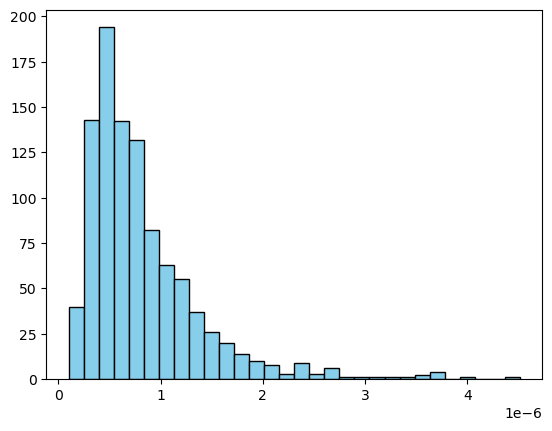

In [12]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')